#### 정규화하지 않는 데이터로 모델링

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('fb-scaling-not-pos-X-2')
df_y = read_data('fb-scaling-not-pos-y-2')

In [3]:
training_columns = df_X.columns

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [5]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.451e+15, tolerance: 4.885e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.626679, MAPE: 16.952986, MSE: 5140627790117.535156, RMSE: 2267295.258699, MAE: 1196573.912387
`LASSO` object has no attribute `feature_importances_`


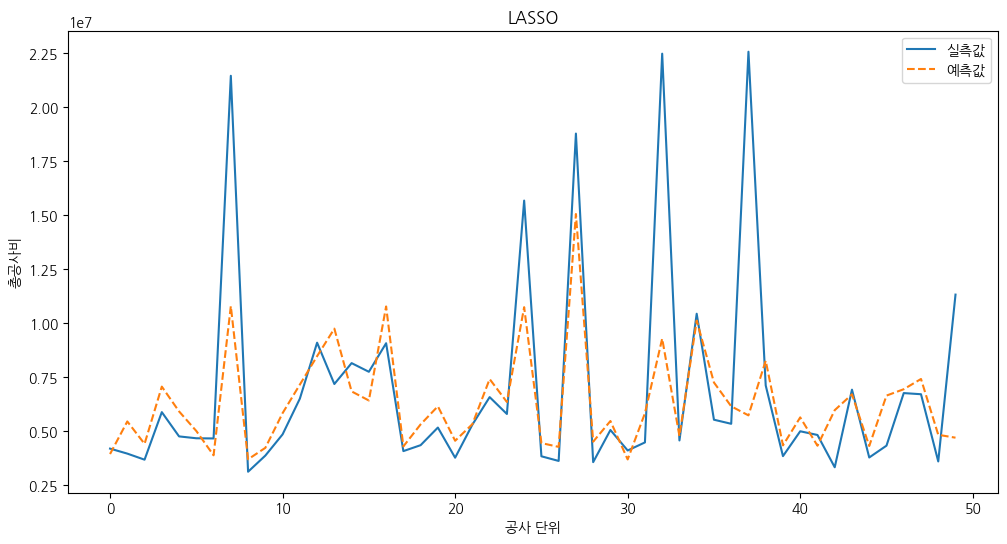

Evaluation: RIDGE
R2_SCORE: 0.627146, MAPE: 16.920707, MSE: 5134195359153.374023, RMSE: 2265876.289464, MAE: 1195217.160705
`RIDGE` object has no attribute `feature_importances_`


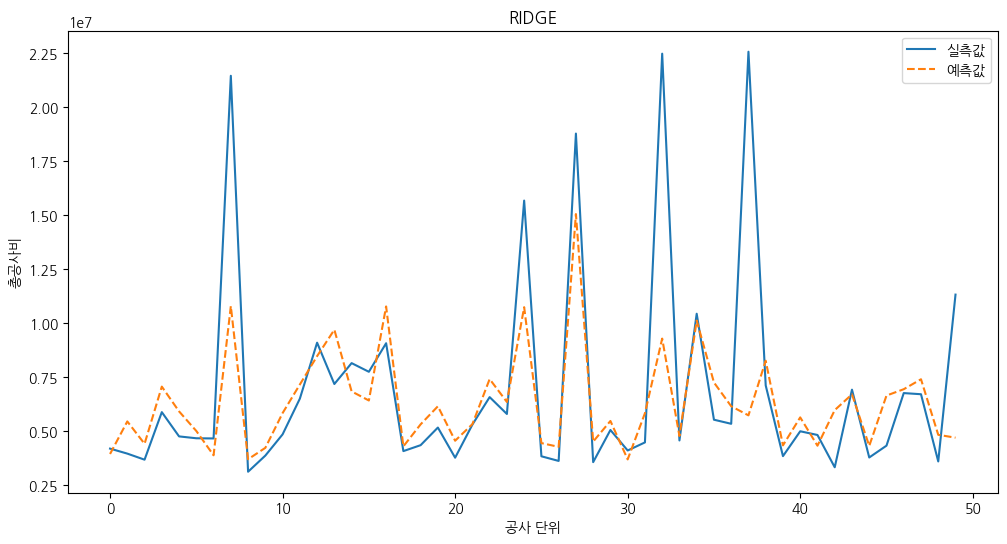

Evaluation: KNR
R2_SCORE: 0.521321, MAPE: 16.283697, MSE: 6591405368182.945312, RMSE: 2567373.242866, MAE: 1245682.914480
`KNR` object has no attribute `feature_importances_`


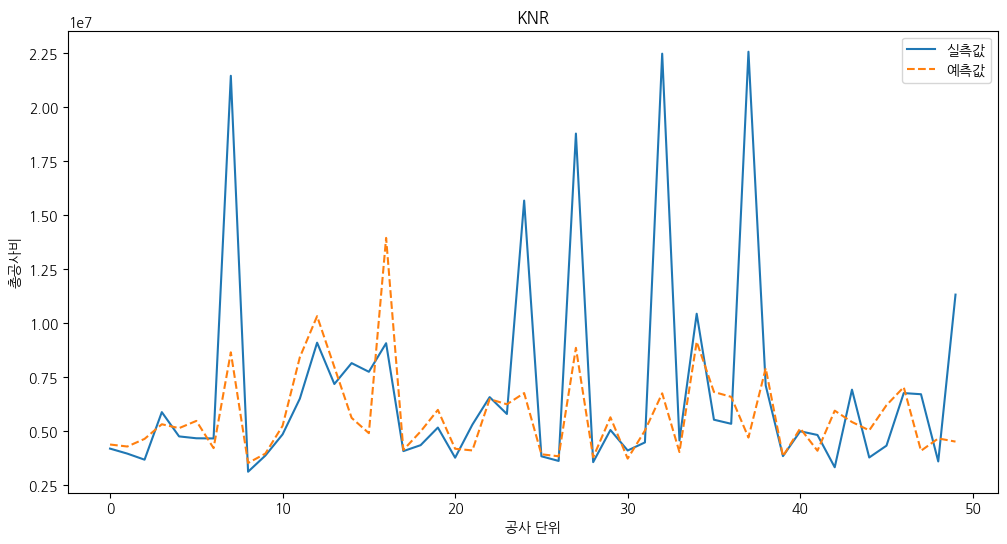

Evaluation: DTR
R2_SCORE: 0.167734, MAPE: 25.631331, MSE: 11460309754715.267578, RMSE: 3385307.926130, MAE: 1701018.570136


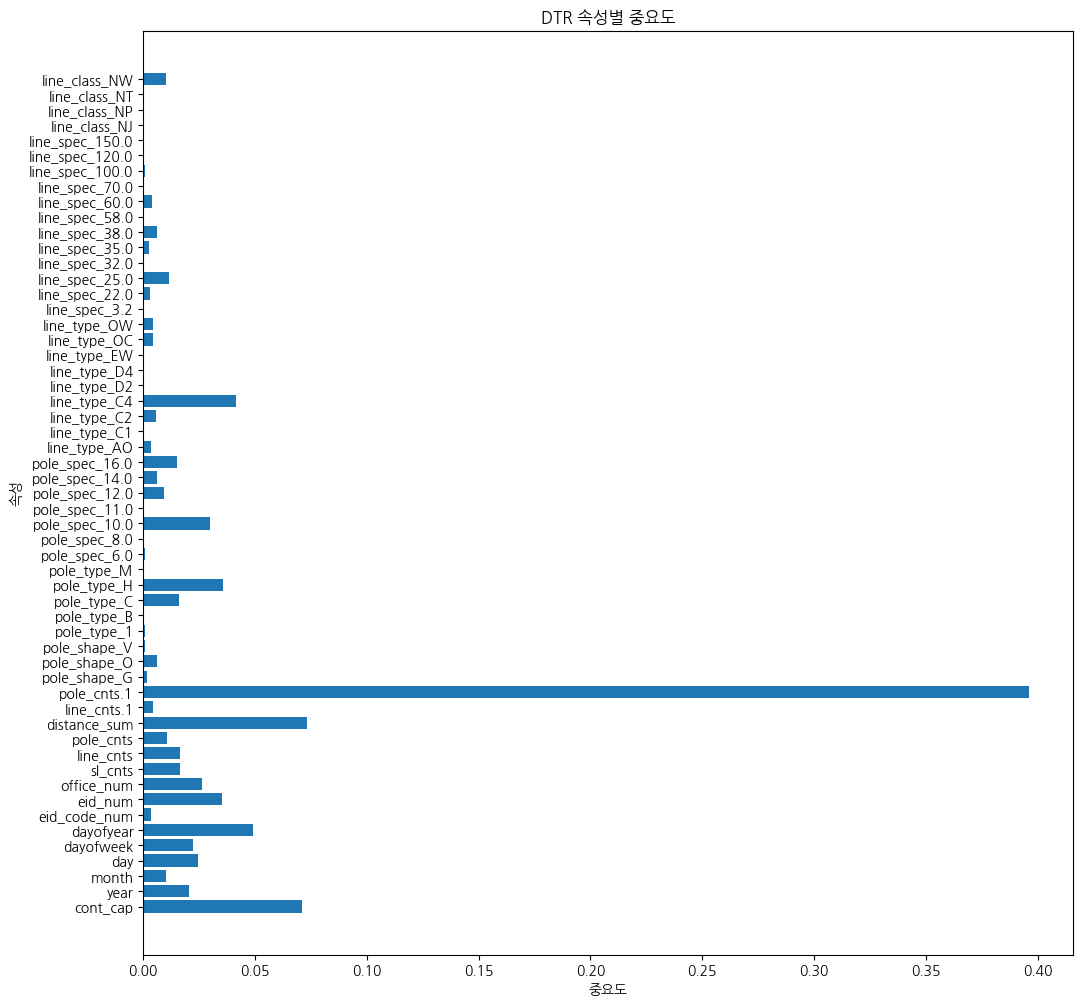

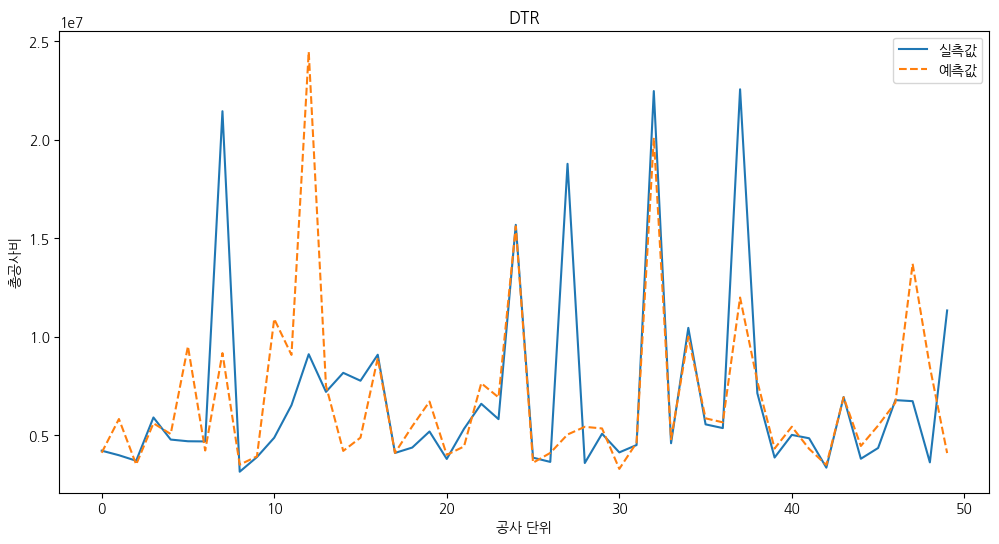

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.550180, MAPE: 19.276760, MSE: 6194021382575.527344, RMSE: 2488779.094772, MAE: 1318006.813316


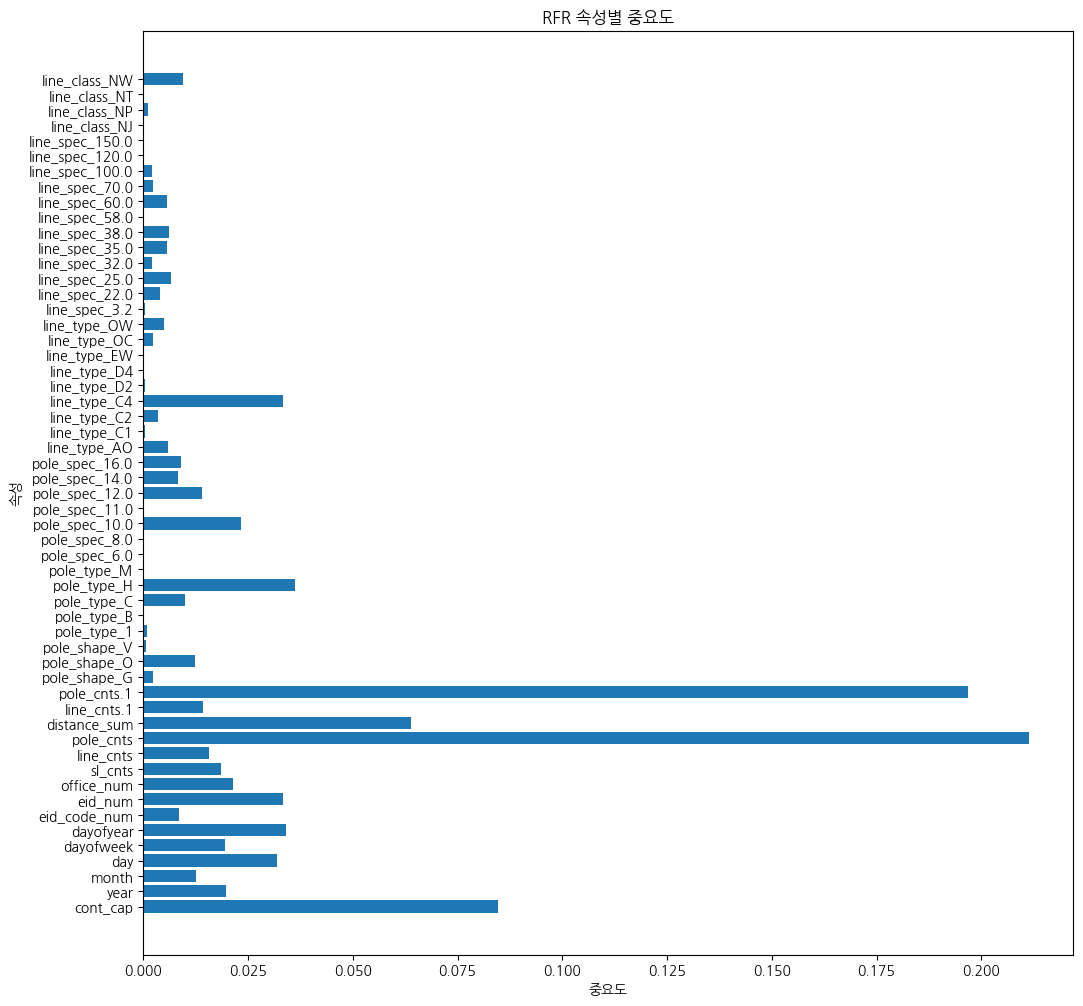

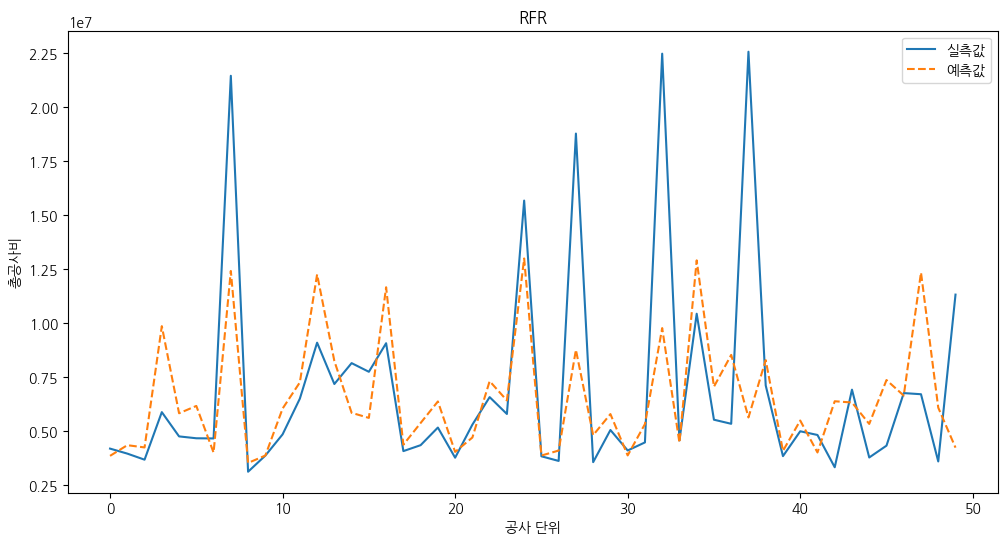

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.620824, MAPE: 16.969377, MSE: 5221248917044.849609, RMSE: 2285005.233483, MAE: 1176018.044544


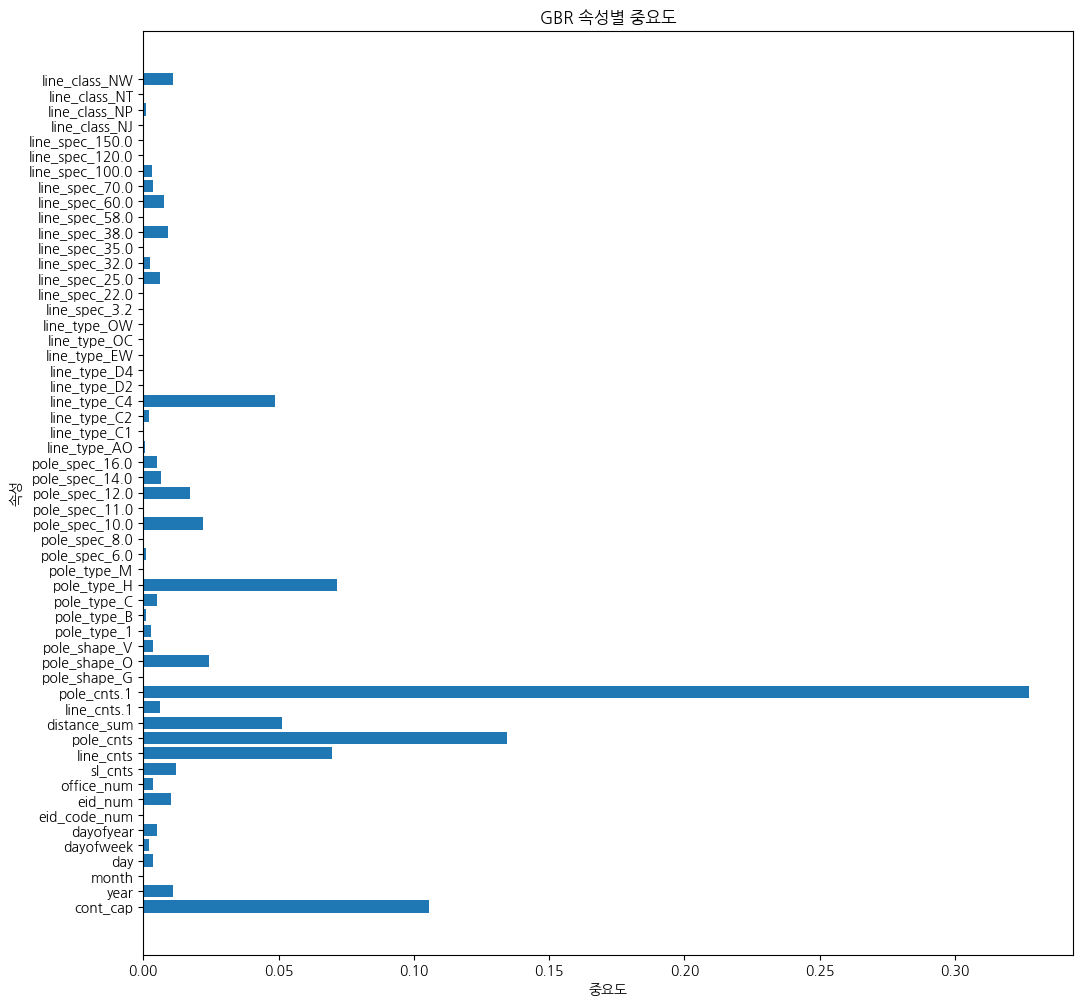

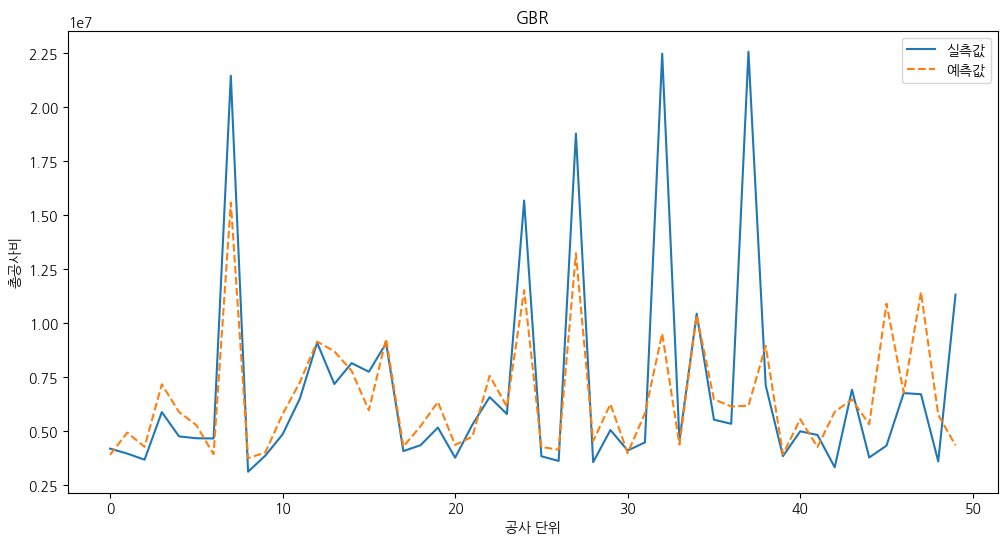

Evaluation: EN
R2_SCORE: 0.628569, MAPE: 16.663704, MSE: 5114605708267.002930, RMSE: 2261549.404339, MAE: 1181355.437008
`EN` object has no attribute `feature_importances_`


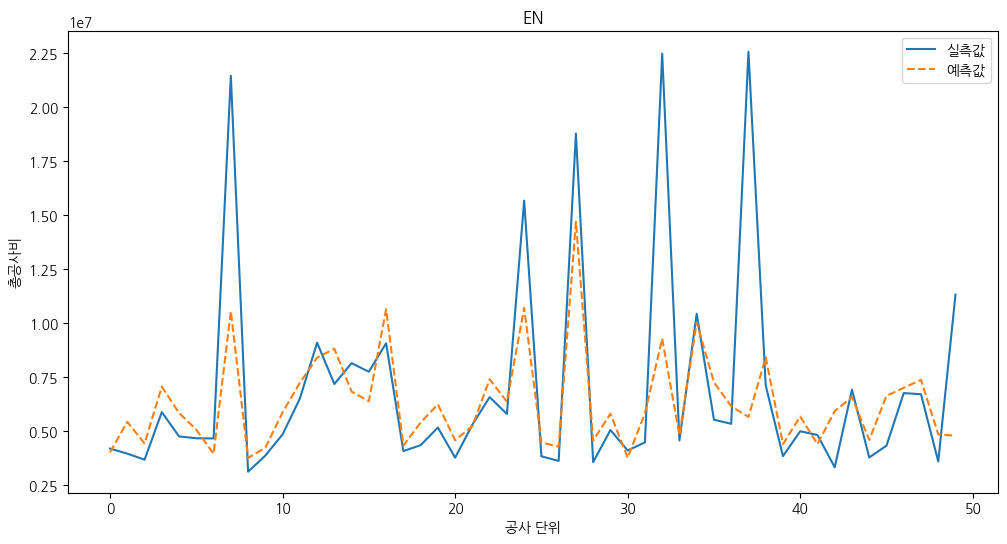

Evaluation: XGR
R2_SCORE: 0.035446, MAPE: 33.227590, MSE: 13281913082834.470703, RMSE: 3644435.907357, MAE: 2422352.443439


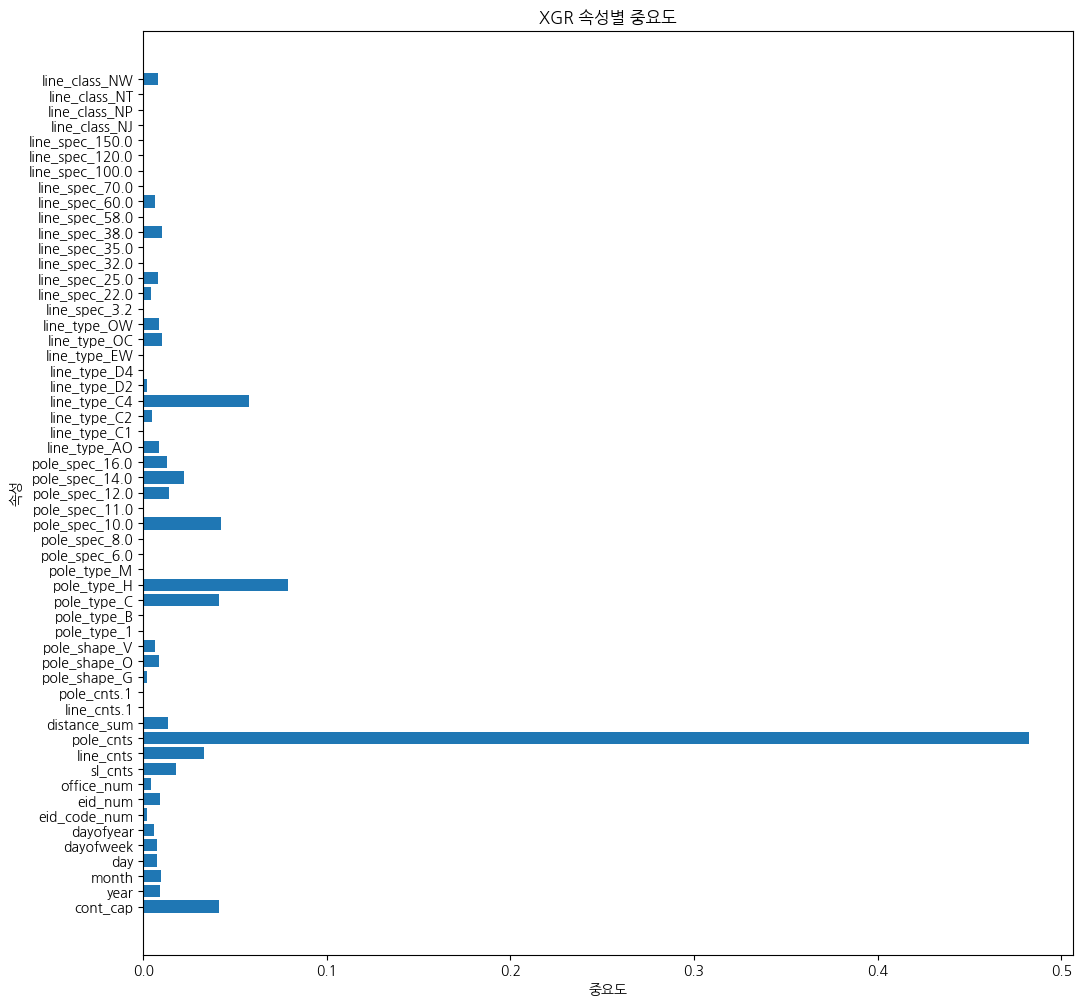

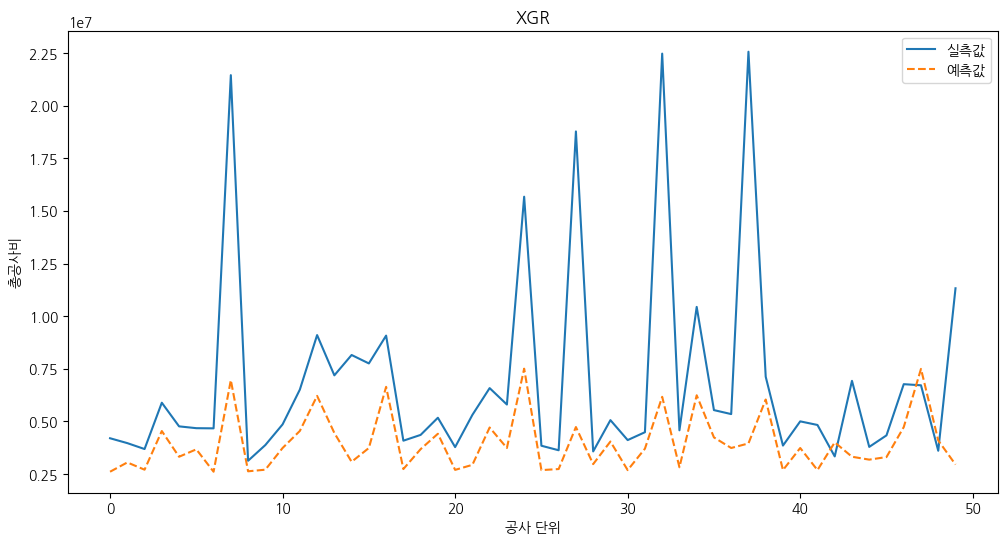

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.626679,0.169530,5.140628e+12,2.267295e+06,1.196574e+06
RIDGE,0.627146,0.169207,5.134195e+12,2.265876e+06,1.195217e+06
KNR,0.521321,0.162837,6.591405e+12,2.567373e+06,1.245683e+06
DTR,0.167734,0.256313,1.146031e+13,3.385308e+06,1.701019e+06
RFR,0.550180,0.192768,6.194021e+12,2.488779e+06,1.318007e+06
GBR,0.620824,0.169694,5.221249e+12,2.285005e+06,1.176018e+06
EN,0.628569,0.166637,5.114606e+12,2.261549e+06,1.181355e+06
XGR,0.035446,0.332276,1.328191e+13,3.644436e+06,2.422352e+06


In [9]:
df_X.head()

,cont_cap,year,month,day,dayofweek,dayofyear,eid_code_num,eid_num,office_num,sl_cnts,...,line_spec_58.0,line_spec_60.0,line_spec_70.0,line_spec_100.0,line_spec_120.0,line_spec_150.0,line_class_NJ,line_class_NP,line_class_NT,line_class_NW
0,0.077947,0.438493,1.253844,0.601168,-1.381578,1.300981,-0.779693,-0.302737,-1.638886,-0.194589,...,-0.017708,-0.074323,-0.039432,-0.027094,0.0,0.0,0.0,-0.096664,-0.020191,2.300904
1,-0.396285,-1.735270,0.657181,-1.027244,-1.381578,0.580263,-0.779693,-0.302737,-1.638886,-0.194589,...,-0.017708,-0.074323,-0.039432,-0.027094,0.0,0.0,0.0,-0.096664,-0.020191,0.039424
2,-0.396285,-1.735270,0.955512,-0.910929,0.613115,0.882185,-0.779693,-0.302737,-1.638886,-0.194589,...,-0.017708,-0.074323,-0.039432,-0.027094,0.0,0.0,0.0,-0.096664,-0.020191,-0.714403
3,-0.396285,-1.735270,0.955512,-0.445668,-1.381578,0.921143,-0.779693,-0.302737,-1.638886,-0.194589,...,-0.017708,-0.074323,-0.039432,-0.027094,0.0,0.0,0.0,-0.096664,-0.020191,2.300904
4,0.077947,-1.735270,1.552175,1.648004,-0.051783,1.690559,-0.779693,-0.302737,-1.638886,-0.194589,...,-0.017708,-0.074323,-0.039432,-0.027094,0.0,0.0,0.0,-0.096664,-0.020191,2.300904


In [10]:
df_y.head()

,total_cons_cost
0,11598900
1,5362339
2,3132017
3,4280339
4,13686684
